In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns # 시각화 라이브러리
import warnings # 경고창 없애기
import matplotlib.pyplot as pit
import matplotlib.pyplot as pit
import seaborn as sns
warnings.filterwarnings('ignore')

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [2]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [3]:
train.corr()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
no,1.000000,0.001111,0.002347,-0.008466,0.003916,0.003246,0.003166,-0.004080
age,0.001111,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,0.002347,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,-0.008466,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.003916,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.003246,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.003166,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,-0.004080,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


In [4]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
X_train = train.drop(["no","fnlwgt"], axis = 1)
X_test = test.drop(["no","fnlwgt"], axis = 1)

In [6]:
y_train = train[['income']]

In [7]:
X_train.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   education       29305 non-null  object
 3   education-num   29305 non-null  int64 
 4   marital-status  29305 non-null  object
 5   occupation      29305 non-null  object
 6   relationship    29305 non-null  object
 7   race            29305 non-null  object
 8   sex             29305 non-null  object
 9   capital-gain    29305 non-null  int64 
 10  capital-loss    29305 non-null  int64 
 11  hours-per-week  29305 non-null  int64 
 12  native-country  29305 non-null  object
 13  income          29305 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.1+ MB


# capital

In [79]:
X_train['capital-gain'].value_counts()

0        26883
15024      300
7688       240
7298       204
99999      148
         ...  
2993         1
6612         1
3456         1
6097         1
22040        1
Name: capital-gain, Length: 117, dtype: int64

# age -> age_group

In [9]:
X_train['age'].value_counts()

35    828
33    825
23    818
34    805
31    793
     ... 
88      4
85      2
89      1
86      1
87      1
Name: age, Length: 74, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='age'>

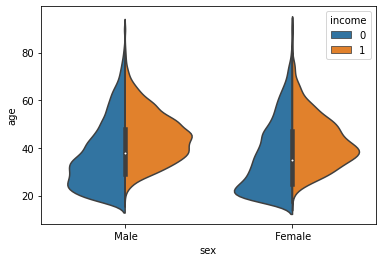

In [10]:
sns.violinplot(data = train, x = 'sex', y = 'age', hue = 'income', split = True)

In [11]:
train['age'].describe()

count    29305.000000
mean        38.659171
std         13.743827
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [12]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [13, 28, 37,48,90]
# labels 구간별 명칭
labels = ['A','B',"C","D"]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['age'], bins = bins, labels = labels)
X_train['age_group'] = train_cut
test_cut = pd.cut(test['age'], bins = bins, labels = labels)
X_test['age_group'] = test_cut

In [13]:
X_train['age_group'].value_counts()

A    7948
C    7330
B    7084
D    6943
Name: age_group, dtype: int64

In [14]:
X_test['age_group'].value_counts()

A    5344
C    5017
B    4598
D    4578
Name: age_group, dtype: int64

# education

<AxesSubplot:xlabel='sex', ylabel='education-num'>

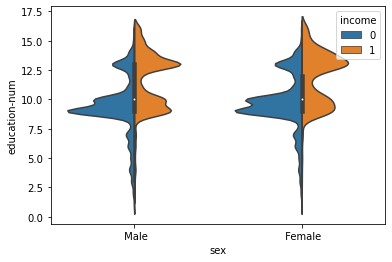

In [15]:
sns.violinplot(data = train, x = 'sex', y = 'education-num', hue = 'income', split = True)

In [16]:
train['education-num'].describe()

count    29305.000000
mean        10.083057
std          2.570371
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [17]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [1, 9, 10,12,16]
# labels 구간별 명칭
labels = ['A','B',"C","D"]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['education-num'], bins = bins, labels = labels)
X_train['edu_group'] = train_cut
test_cut = pd.cut(test['education-num'], bins = bins, labels = labels)
X_test['edu_group'] = test_cut

In [18]:
X_train['edu_group'].value_counts()

A    13209
D     7282
B     6558
C     2210
Name: edu_group, dtype: int64

In [19]:
X_test['edu_group'].value_counts()

A    8900
D    4828
B    4320
C    1452
Name: edu_group, dtype: int64

# occupation

In [20]:
X_train["occupation"] = X_train["occupation"].str.replace('?', 'other')
X_test["occupation"] = X_test["occupation"].str.replace('?', 'other')
X_train["occupation"] = X_train["occupation"].str.replace('Armed-Forces', 'other')
X_test["occupation"] = X_test["occupation"].str.replace('Armed-Forces', 'other')
X_train["occupation"] = X_train["occupation"].str.replace('Priv-house-serv', 'other')
X_test["occupation"] = X_test["occupation"].str.replace('Priv-house-serv', 'other')

In [21]:
X_train['occupation'].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 other                1824
 Machine-op-inspct    1811
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
Name: occupation, dtype: int64

In [22]:
X_test['occupation'].value_counts()

 Craft-repair         2480
 Exec-managerial      2477
 Prof-specialty       2448
 Sales                2212
 Adm-clerical         2171
 Other-service        1948
 other                1242
 Machine-op-inspct    1211
 Transport-moving      962
 Handlers-cleaners     823
 Farming-fishing       602
 Tech-support          581
 Protective-serv       380
Name: occupation, dtype: int64

# marry

In [23]:
X_train["marital-status"] = X_train["marital-status"].str.replace('Married-spouse-absent','Other')
X_test["marital-status"] = X_test["marital-status"].str.replace('Married-spouse-absent','Other')
X_train["marital-status"] = X_train["marital-status"].str.replace('Married-AF-spouse','Other')
X_test["marital-status"] = X_test["marital-status"].str.replace('Married-AF-spouse','Other')

In [24]:
X_train['marital-status'].value_counts()

 Married-civ-spouse    13331
 Never-married          9673
 Divorced               4030
 Widowed                 942
 Separated               914
 Other                   415
Name: marital-status, dtype: int64

In [25]:
X_test['marital-status'].value_counts()

 Married-civ-spouse    9048
 Never-married         6444
 Divorced              2603
 Separated              616
 Widowed                576
 Other                  250
Name: marital-status, dtype: int64

# work_hour

In [26]:
X_train['hours-per-week'].value_counts()

40    13652
50     2554
45     1647
60     1352
35     1154
      ...  
97        1
73        1
82        1
94        1
69        1
Name: hours-per-week, Length: 93, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='hours-per-week'>

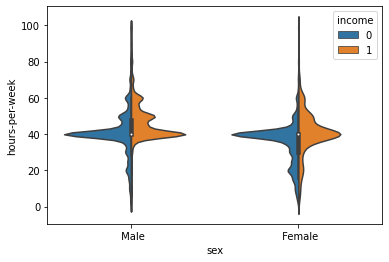

In [27]:
sns.violinplot(data = train, x = 'sex', y = 'hours-per-week', hue = 'income', split = True)

In [28]:
train['hours-per-week'].describe()

count    29305.000000
mean        40.440096
std         12.332840
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [29]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [1, 40, 45, 90]
# labels 구간별 명칭
labels = ['A','B', "C"]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['hours-per-week'], bins = bins, labels = labels)
X_train['hour_group'] = train_cut
test_cut = pd.cut(test['hours-per-week'], bins = bins, labels = labels)
X_test['hour_group'] = test_cut

In [30]:
X_train['hour_group'].value_counts()

A    20639
C     6386
B     2186
Name: hour_group, dtype: int64

In [31]:
X_test['hour_group'].value_counts()

A    13824
C     4144
B     1465
Name: hour_group, dtype: int64

# country

In [32]:
X_train['native-country'] = X_train['native-country'].str.replace('?', 'Other')
X_test['native-country'] = X_test['native-country'].str.replace('?', 'Other')

In [33]:
X_test['native-country'].describe()

count              19537
unique                41
top        United-States
freq               17531
Name: native-country, dtype: object

In [34]:
X_train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
 Other                           495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 China                            68
 Jamaica                          68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Columbia                         53
 Poland                           53
 Haiti                            51
 Guatemala                        51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Greece                           25
 

# workclass

In [35]:
X_train["workclass"] = X_train["workclass"].str.replace('?', 'Other')
X_test["workclass"] = X_test["workclass"].str.replace('?', 'Other')

In [36]:
X_train["workclass"] = X_train["workclass"].str.replace('Without-pay', 'Other')
X_test["workclass"] = X_test["workclass"].str.replace('Without-pay', 'Other')
X_train["workclass"] = X_train["workclass"].str.replace('Never-worked', 'Other')
X_test["workclass"] = X_test["workclass"].str.replace('Never-worked', 'Other')

In [37]:
X_train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 Other                1680
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
Name: workclass, dtype: int64

In [38]:
X_test['workclass'].value_counts()

 Private             13496
 Self-emp-not-inc     1557
 Local-gov            1268
 Other                1150
 State-gov             780
 Self-emp-inc          708
 Federal-gov           578
Name: workclass, dtype: int64

# race

In [39]:
X_train['race'].value_counts()

 White                 25081
 Black                  2776
 Asian-Pac-Islander      919
 Amer-Indian-Eskimo      290
 Other                   239
Name: race, dtype: int64

In [40]:
X_test['race'].value_counts()

 White                 16681
 Black                  1909
 Asian-Pac-Islander      600
 Amer-Indian-Eskimo      180
 Other                   167
Name: race, dtype: int64

# 컬럼정리

In [41]:
X_train.shape, y_train.shape, X_test.shape

((29305, 18), (29305, 1), (19537, 17))

In [42]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_group', 'edu_group', 'hour_group'],
      dtype='object')

In [43]:
X_train.drop(["age","hours-per-week", 'education-num'], axis = 1, inplace = True)
X_test.drop(["age","hours-per-week", 'education-num'], axis = 1, inplace = True)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [45]:
X_train.shape, y_train.shape, X_test.shape

((29305, 15), (29305, 1), (19537, 14))

In [46]:
X_train.head()

,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income,age_group,edu_group,hour_group
0,Private,219199,11th,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,United-States,0,A,A,A
1,Private,52978,Some-college,Divorced,Other-service,Not-in-family,White,Female,0,1721,United-States,0,C,B,C
2,Private,196899,Bachelors,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,Haiti,0,B,D,C
3,Private,135527,Assoc-voc,Divorced,Tech-support,Not-in-family,White,Female,0,0,United-States,0,D,C,A
4,Private,60783,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,United-States,1,A,B,C


In [47]:
categorical_feature = ["education",'workclass','marital-status','occupation',"relationship",'race', 'sex', 'native-country', "age_group", "edu_group","hour_group"]

In [48]:
y_train = train['income']
X_train.drop('income', axis =1, inplace = True)

In [49]:
X_train.shape, X_test.shape

((29305, 14), (19537, 14))

In [50]:
combine = pd.concat([X_train,X_test], ignore_index =True)

In [51]:
# 원핫 인코딩
# get_dummies
one_hot = pd.get_dummies(combine[categorical_feature])

In [52]:
# 기존 글자데이터 지우기
combine.drop(categorical_feature, axis = 1, inplace = True)

In [53]:
# 원핫 인코딩 데이터 합치기
total_combine = pd.concat([combine, one_hot], axis = 1)

In [54]:
total_combine

,fnlwgt,capital-gain,capital-loss,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,...,age_group_B,age_group_C,age_group_D,edu_group_A,edu_group_B,edu_group_C,edu_group_D,hour_group_A,hour_group_B,hour_group_C
0,219199,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,52978,0,1721,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,196899,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,135527,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,60783,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,116789,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
48838,185079,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
48839,117473,4386,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
48840,150817,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [55]:
total_combine.shape

(48842, 111)

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 6)

In [57]:
X_train = total_combine.iloc[:29305]
X_test = total_combine.iloc[29305:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(29305, 111)
(19537, 111)
(29305,)


In [58]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [59]:
tree_model.score(X_train, y_train)

0.8496843542057669

In [60]:
pre = tree_model.predict(X_test)

In [61]:
no = pd.read_csv('./sample_submission.csv')
no['income'] = pre
no.to_csv('mySubmission00.csv', index = False)

In [62]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [63]:
# 검증 데이터 만들기(validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 5)

In [64]:
train_score_list = []
val_score_list = []

for md in range(1,25) : # 트리 모델이 단순 -> 복잡
    t_model = DecisionTreeClassifier(max_depth=md)
    t_model.fit(X_train,y_train)
    
    train_score = t_model.score(X_train,y_train)
    val_score = t_model.score(X_val,y_val)
    
    train_score_list.append(train_score)
    val_score_list.append(val_score)

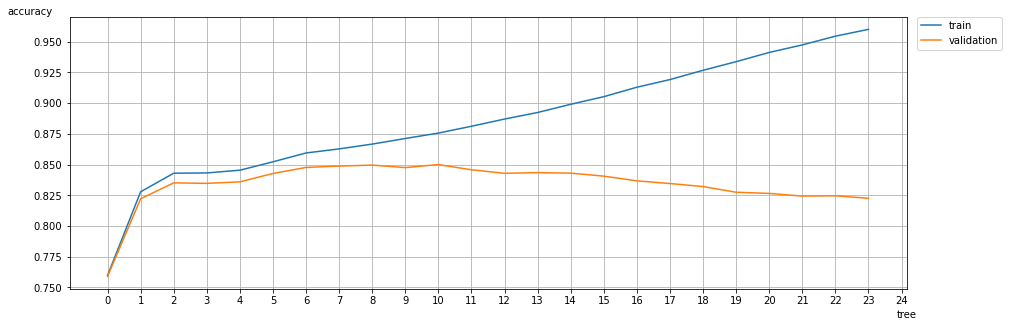

In [65]:
plt.figure(figsize=(15,5)) # 가로,세로
plt.plot(train_score_list,label='train')
plt.plot(val_score_list,label='validation')
plt.xticks(range(0,25))
plt.legend(loc = "upper right", bbox_to_anchor = (1.12,1.02)) # 범례
plt.xlabel('tree', position =(1,0))
plt.ylabel('accuracy', rotation = 0, position = (1,1))
plt.grid()
plt.show()

In [66]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [67]:
final_tree = DecisionTreeClassifier(n_estimators =1000, max_depth = 7)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [68]:
final_pre = final_tree.predict(X_test)

In [69]:
final_tree.score(X_train, y_train)

0.8600921344480464

In [70]:
pre = final_tree.predict(X_test)
no = pd.read_csv('./sample_submission.csv')
no['income'] = pre
no.to_csv('mySubmission00.csv', index = False)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [72]:
gb = GradientBoostingClassifier(random_state=2,learning_rate=0.19
                                ,max_depth=5)
gb.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.3f}".format(gb.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gb.score(X_val,y_val)))

훈련 세트 정확도 : 0.885
테스트 세트 정확도 : 0.883


In [73]:
pre = gb.predict(X_test)
no = pd.read_csv('./sample_submission.csv')
no['income'] = pre
no.to_csv('mySubmission01.csv', index = False)

In [74]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=1000,oob_score = True, 
                            random_state =4, , max_depth = 6)
bagging.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.3f}".format(bagging.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(X_val,y_val)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 1.000


In [75]:
pre = bagging.predict(X_test)
no = pd.read_csv('./sample_submission.csv')
no['income'] = pre
no.to_csv('mySubmission02.csv', index = False)

In [76]:
ada = AdaBoostClassifier(n_estimators =1000 , random_state = 4, 
                        max_depth = 5)
ada.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(ada.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(ada.score(X_val,y_val)))

훈련 세트 정확도 : 0.873
테스트 세트 정확도 : 0.871


In [77]:
pre = ada.predict(X_test)
no = pd.read_csv('./sample_submission.csv')
no['income'] = pre
no.to_csv('mySubmission03.csv', index = False)